<font size = 4> **Описание данных** </font>

**Table_1:**

- *model* — модель самолета
- *flights_amount* — количество рейсов для каждой модели самолетов model в сентябре 2018 года

**Table_2:**

- *city* — город
- *average_flights* — среднее количество рейсов, прибывающих в город city за день в августе 2018 года

<font size = 4> **План работы** </font>

1. Импорт данных и изучение общей информации, проверка типов данных на корректность
2. Определение топ-10 городов по количеству рейсов
3. Построение графиков:
    * количества рейсов в зависимости от города прибытия
    * количества рейсов в зависимости от модели самолета
4. Выводы

## Изучение данных из файлов

### Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from IPython.display import display

### Открытие файлов и изучение общей информации о данных

#### Table_1

In [2]:
table_1 = pd.read_csv('/datasets/query_1.csv') #открываем файл с данными по первой таблице

In [3]:
display(table_1) #посмотрим на данные

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
table_1.info() #посмотрим на общую информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


**Вывод:** 

таблица состоит из 8 строк и 2 столбцов, пропущенных значений нет, типы данных указаны корректно.

#### Table_2

In [5]:
table_2 = pd.read_csv('/datasets/query_3.csv') #открываем файл с данными по второй таблице

In [6]:
display(table_2.sample(10,random_state=1)) #посмотрим на данные

,city,average_flights
94,Челябинск,6.709677
78,Сыктывкар,4.129032
17,Геленджик,2.590909
100,Ярославль,1.322581
36,Кызыл,1.277778
85,Урай,2.000000
55,Новый Уренгой,8.290323
83,Улан-Удэ,1.608696
82,Удачный,3.000000
52,Нижний Новгород,5.870968


In [7]:
table_2.info() #посмотрим на общую информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [8]:
#table_2['average_flights'] = table_2['average_flights'].astype('int')

**Вывод:** таблица состоит из 101 строки и 2 столбцов, пропущенных значений нет.

## Определение топ-10 городов по количеству рейсов

Посмотрим на 10 городов - лидеров по числу рейсов

In [9]:
table_2_leaders = table_2.sort_values(by='average_flights', ascending=False).head(10)

In [10]:
display(table_2_leaders)

,city,average_flights
43,Москва,129
70,Санкт-Петербург,31
54,Новосибирск,17
20,Екатеринбург,11
33,Красноярск,11
63,Пермь,10
67,Ростов-на-Дону,10
10,Брянск,10
84,Ульяновск,9
73,Советский,9


Text(0, 0.5, 'Среднее количество рейсов в день')

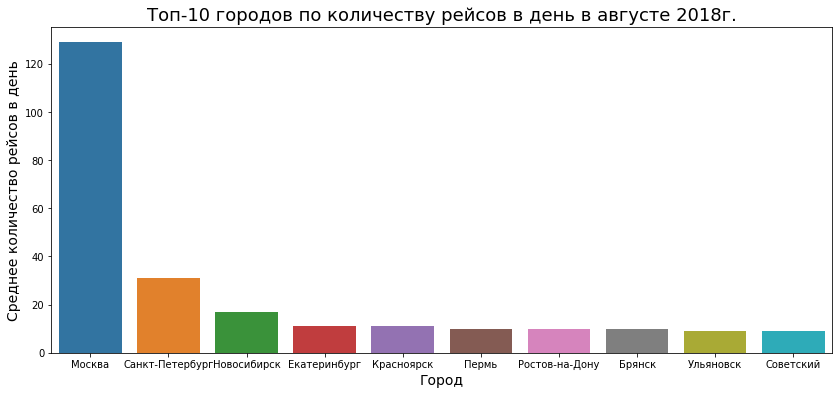

In [11]:
plt.figure(figsize=(14,6))
plt.title("Топ-10 городов по количеству рейсов в день в августе 2018г.",size=18)
sns.barplot(x=table_2_leaders['city'], y=table_2_leaders['average_flights'])
plt.xlabel("Город",size=14)
plt.ylabel("Среднее количество рейсов в день",size=14)

**Вывод:** 
    
абсолютный лидер - Москва, не зря же столица, на втором месте - Санкт-Петербург - культурная столица. Удивительно, но в лидеры попал небольшой город Советский. 

При наличии большей выборки данные по г. Советский лучше перепроверить.

## Количество рейсов в зависимости от города прибытия

Посмотрим как распределяется среднее количество рейсов в каждый город

In [12]:
table_2_all = table_2.sort_values(by='average_flights', ascending=False)

Text(0, 0.5, 'Город')

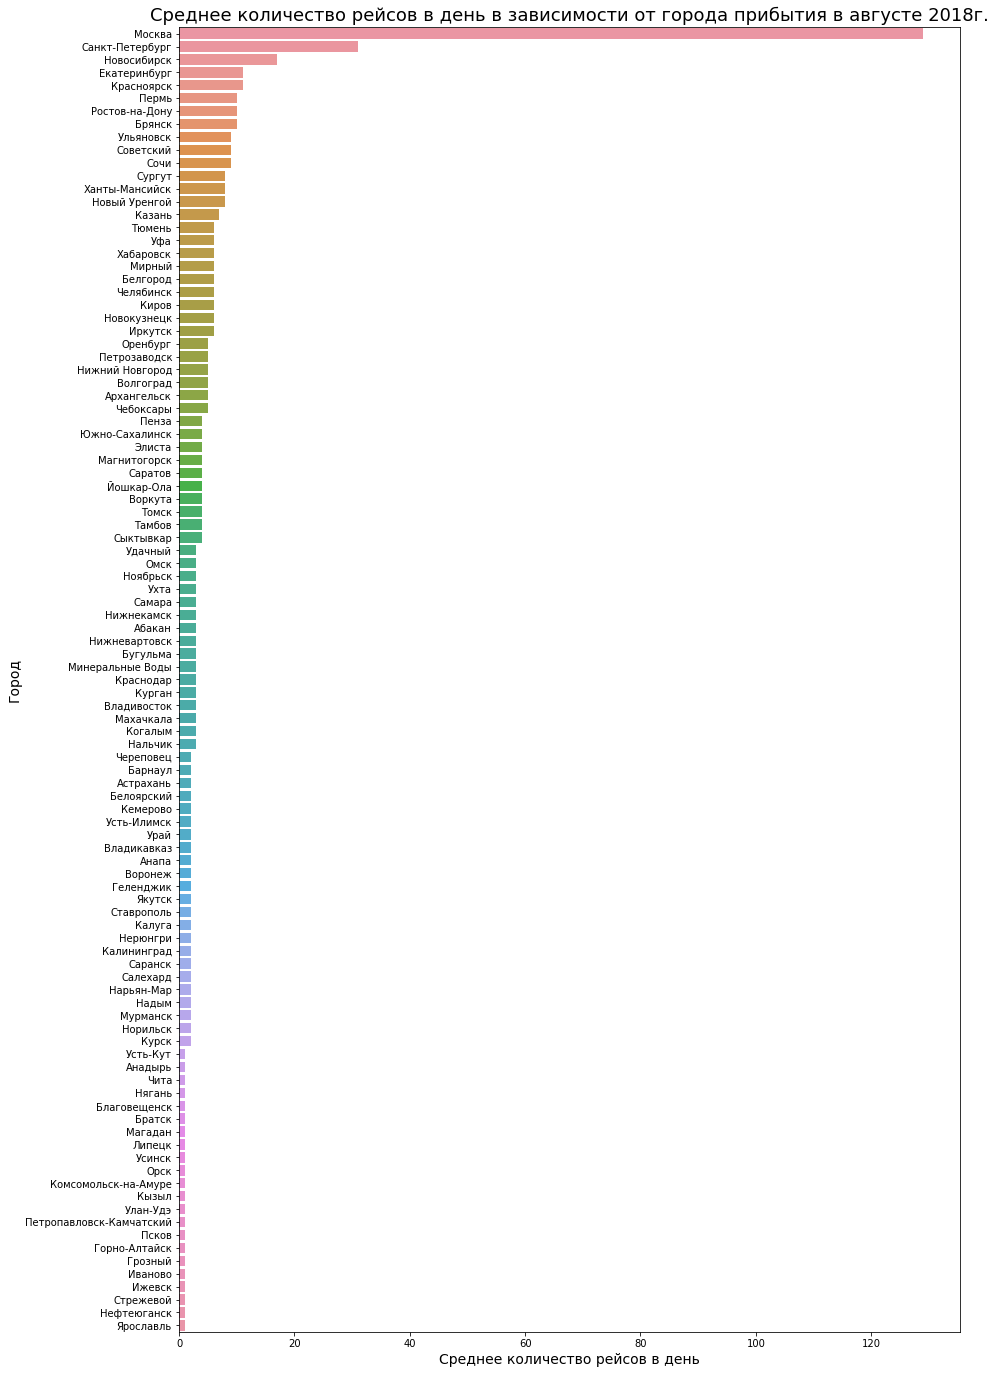

In [13]:
plt.figure(figsize=(14,24))
plt.title("Среднее количество рейсов в день в зависимости от города прибытия в августе 2018г.",size=18)
sns.barplot(x=table_2_all['average_flights'], y=table_2_all['city'])
plt.xlabel("Среднее количество рейсов в день",size=14)
plt.ylabel("Город",size=14)

**Вывод:**
    
Учитывая протяженность нашей страны, рейсы есть во многие города, но частота полетов конечно разная, Москва и Санкт-Петербург как столица и культурная столица - в бесспорных лидерах, далее распределение частоты идет в зависимости от бизнес-среды города, благосостояния населения, т.к. авиаперелеты не из дешевых, а также возможности международных перелетов. Также не будем забывать тот факт, что август - горячая пора для отпусков и возвращения детей с каникул, поэтому количество полетов может быть значительно больше, чем в другие месяцы, особенно в южные города. 

## Количество рейсов в зависимости от модели самолета

In [14]:
table_1 = table_1.sort_values(by='flights_amount', ascending=False)

Text(0, 0.5, 'Количество рейсов')

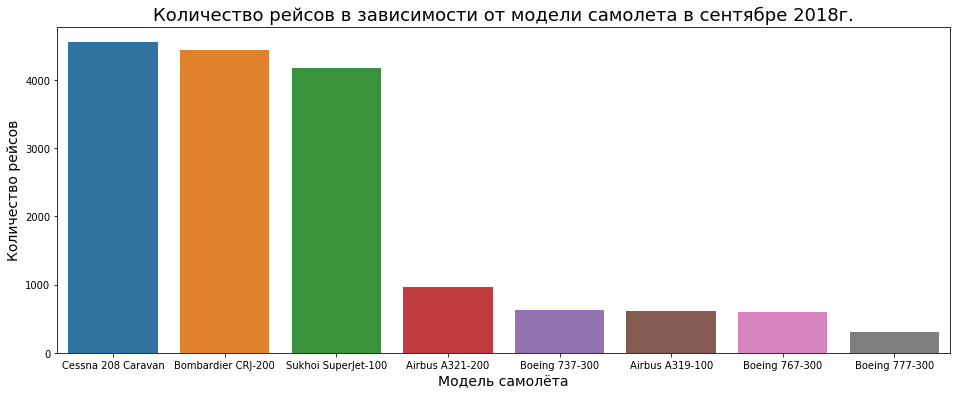

In [15]:
plt.figure(figsize=(16,6))
plt.title("Количество рейсов в зависимости от модели самолета в сентябре 2018г.",size=18)
sns.barplot(x=table_1['model'], y=table_1['flights_amount'])
plt.xlabel("Модель самолёта",size=14)
plt.ylabel("Количество рейсов",size=14)

**Вывод:**

В РФ чаще всего используются самолеты малой вместимости. Самолеты с большой вместимостью используются реже всего.

## Выводы:

1. Учитывая протяженность страны, рейсы есть во многие города, но частота полетов, конечно, разная, Москва и Санкт-Петербург как столица и культурная столица - в бесспорных лидерах, далее распределение частоты идет в зависимости от бизнес-среды города, благосостояния населения, т.к. авиаперелеты не из дешевых, а также возможности международных перелетов. Также не будем забывать тот факт, что август - горячая пора для отпусков и возвращения детей с каникул, поэтому количество полетов может быть значительно больше, чем в другие месяцы, особенно в южные города. 
2. В РФ чаще всего используют самолеты малой вместимости.  